In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("twentyeleven.csv")
print(df.shape)
df.head()

(484330, 11)


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,date,revenue,year
0,539993.0,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04T10:00:00Z,1.95,13313.0,United Kingdom,2011-01-04,19.5,2011
1,539993.0,21499,BLUE POLKADOT WRAP,25,2011-01-04T10:00:00Z,0.42,13313.0,United Kingdom,2011-01-04,10.5,2011
2,539993.0,21498,RED RETROSPOT WRAP,25,2011-01-04T10:00:00Z,0.42,13313.0,United Kingdom,2011-01-04,10.5,2011
3,539993.0,22379,RECYCLING BAG RETROSPOT,5,2011-01-04T10:00:00Z,2.10,13313.0,United Kingdom,2011-01-04,10.5,2011
4,539993.0,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04T10:00:00Z,1.25,13313.0,United Kingdom,2011-01-04,12.5,2011


In [3]:
df = df.drop_duplicates()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484330 entries, 0 to 484329
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      484329 non-null  float64
 1   StockCode    484330 non-null  object 
 2   Description  484330 non-null  object 
 3   Quantity     484330 non-null  int64  
 4   InvoiceDate  484330 non-null  object 
 5   Price        484330 non-null  float64
 6   Customer ID  367058 non-null  float64
 7   Country      484330 non-null  object 
 8   date         484330 non-null  object 
 9   revenue      484330 non-null  float64
 10  year         484330 non-null  int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 40.6+ MB


In [5]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
df["InvoiceDate"]

0        2011-01-04 10:00:00+00:00
1        2011-01-04 10:00:00+00:00
2        2011-01-04 10:00:00+00:00
3        2011-01-04 10:00:00+00:00
4        2011-01-04 10:00:00+00:00
                    ...           
484325   2011-12-09 12:50:00+00:00
484326   2011-12-09 12:50:00+00:00
484327   2011-12-09 12:50:00+00:00
484328   2011-12-09 12:50:00+00:00
484329   2011-12-09 12:50:00+00:00
Name: InvoiceDate, Length: 484330, dtype: datetime64[ns, UTC]

In [6]:
df["year"]=df["InvoiceDate"].dt.year
df["month"]=df["InvoiceDate"].dt.month
df["day"]=df["InvoiceDate"].dt.day
df["dayofweek"]=df["InvoiceDate"].dt.dayofweek
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,date,revenue,year,month,day,dayofweek
0,539993.0,22386,JUMBO BAG PINK POLKADOT,10,2011-01-04 10:00:00+00:00,1.95,13313.0,United Kingdom,2011-01-04,19.5,2011,1,4,1
1,539993.0,21499,BLUE POLKADOT WRAP,25,2011-01-04 10:00:00+00:00,0.42,13313.0,United Kingdom,2011-01-04,10.5,2011,1,4,1
2,539993.0,21498,RED RETROSPOT WRAP,25,2011-01-04 10:00:00+00:00,0.42,13313.0,United Kingdom,2011-01-04,10.5,2011,1,4,1
3,539993.0,22379,RECYCLING BAG RETROSPOT,5,2011-01-04 10:00:00+00:00,2.10,13313.0,United Kingdom,2011-01-04,10.5,2011,1,4,1
4,539993.0,20718,RED RETROSPOT SHOPPER BAG,10,2011-01-04 10:00:00+00:00,1.25,13313.0,United Kingdom,2011-01-04,12.5,2011,1,4,1


In [7]:
df["Month-Year"]=df["InvoiceDate"].dt.strftime("%B-%Y")
df["Month-Year"]

0          January-2011
1          January-2011
2          January-2011
3          January-2011
4          January-2011
              ...      
484325    December-2011
484326    December-2011
484327    December-2011
484328    December-2011
484329    December-2011
Name: Month-Year, Length: 484330, dtype: object

In [8]:
last_purchase_date = df[["Customer ID","InvoiceDate"]].groupby(["Customer ID"], as_index=False).max()

In [9]:
max_date = df["InvoiceDate"].max()
max_date

Timestamp('2011-12-09 12:50:00+0000', tz='UTC')

In [10]:
last_purchase_date["recency"] = max_date-last_purchase_date["InvoiceDate"]
last_purchase_date

,Customer ID,InvoiceDate,recency
0,12347.0,2011-12-07 15:52:00+00:00,1 days 20:58:00
1,12348.0,2011-09-25 13:13:00+00:00,74 days 23:37:00
2,12349.0,2011-11-21 09:51:00+00:00,18 days 02:59:00
3,12350.0,2011-02-02 16:01:00+00:00,309 days 20:49:00
4,12352.0,2011-11-03 14:37:00+00:00,35 days 22:13:00
...,...,...,...
4214,18280.0,2011-03-07 09:52:00+00:00,277 days 02:58:00
4215,18281.0,2011-06-12 10:53:00+00:00,180 days 01:57:00
4216,18282.0,2011-12-02 11:43:00+00:00,7 days 01:07:00
4217,18283.0,2011-12-06 12:02:00+00:00,3 days 00:48:00


In [11]:
last_purchase_date["recency_date"]=last_purchase_date["recency"].dt.components["days"]
last_purchase_date.describe()

,Customer ID,recency,recency_date
count,4219.000000,4219,4219.000000
mean,15290.961365,84 days 07:28:44.214268785,83.799479
std,1719.929061,90 days 00:32:32.633204746,90.026384
min,12347.000000,0 days 00:00:00,0.000000
25%,13807.000000,16 days 23:08:30,16.000000
50%,15281.000000,46 days 22:22:00,46.000000
75%,16772.000000,127 days 21:30:30,127.000000
max,18287.000000,339 days 01:08:00,339.000000


(array([1787.,  768.,  432.,  236.,  192.,  197.,  159.,  184.,  141.,
         123.]),
 array([  0. ,  33.9,  67.8, 101.7, 135.6, 169.5, 203.4, 237.3, 271.2,
        305.1, 339. ]),
 <BarContainer object of 10 artists>)

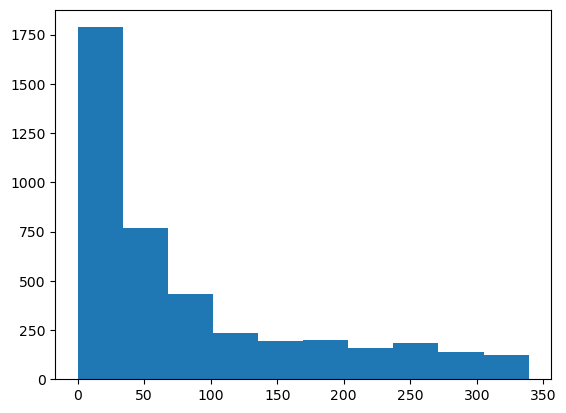

In [12]:
import matplotlib.pyplot as plt
plt.hist(last_purchase_date["recency_date"])

In [13]:
df["date"] = pd.to_datetime(df["date"])
df_date = df.groupby(["date"])[["Quantity"]].sum()
df_date

,Quantity
date,
2011-01-04,8630
2011-01-05,19769
2011-01-06,23174
2011-01-07,17160
2011-01-09,8125
...,...
2011-12-05,44568
2011-12-06,30377
2011-12-07,41844


In [14]:
df_date["one_week_rolling"]=df_date["Quantity"].rolling(window=7).mean()
df_date["two_week_rolling"]=df_date["Quantity"].rolling(window=14).mean()

In [15]:
df_date

,Quantity,one_week_rolling,two_week_rolling
date,,,
2011-01-04,8630,NaN,NaN
2011-01-05,19769,NaN,NaN
2011-01-06,23174,NaN,NaN
2011-01-07,17160,NaN,NaN
2011-01-09,8125,NaN,NaN
...,...,...,...
2011-12-05,44568,28744.714286,27880.642857
2011-12-06,30377,28893.714286,28685.642857
2011-12-07,41844,30470.000000,29836.214286


<Axes: xlabel='date'>

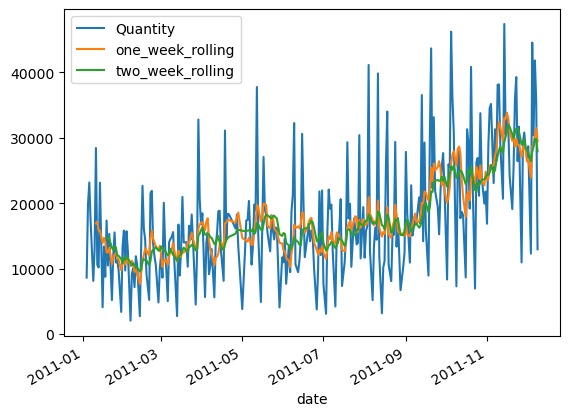

In [16]:
df_date["Dec-2010":"Dec-2011"].plot()

<Axes: xlabel='date'>

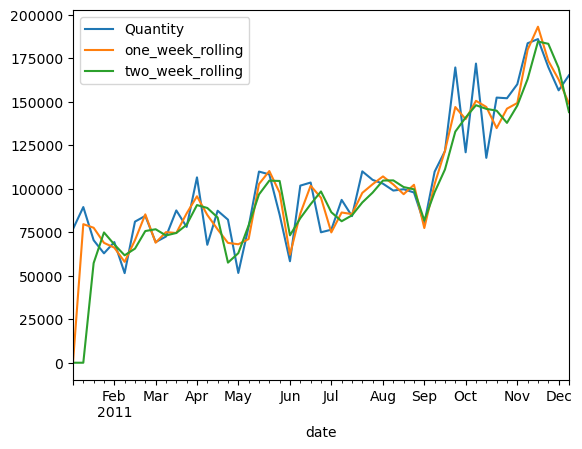

In [17]:
df_week = df_date.resample("W").sum()
df_week.plot()